<h2><center> Welcome to the Ernst & Young Carbon Prediction Hackathon</h2></center>
<figure>
<!-- <center><img src ="https://drive.google.com/uc?export=view&id=1hSOAfRhJ_jo-MZAjq81VYJu5bZNL7EjD" width = "800" height = '500'/> -->

*About the problem*
> The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa.

*Objective of this challenge*
> The objective of this challenge is to create machine learning or a deep learning model using open-source CO2 emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

These solutions will enable EY, governments, and other actors to estimate carbon emission levels across Africa, even in places where on-the-ground monitoring is not possible.



## **Data Understanding**

In [1]:
# install relevant libraries
!pip install geopandas folium

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [4]:
# Load and preview data
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73000,28.77000,2019,1,0.00017,0.71317,0.00010,0.22393,24.93944,...,5566.22202,54826.03262,4606.20999,19.11528,0.35378,24.95195,49.05395,-89.63803,17.98887,86.05170
1,ID_-23.73_28.77_2019_2,-23.73000,28.77000,2019,2,-0.00016,0.81291,-0.00014,0.08028,16.62416,...,3711.51137,68491.75334,3034.46166,12.21866,0.24499,4.70886,42.58668,-89.90431,22.77325,88.87567
2,ID_-23.73_28.77_2019_3,-23.73000,28.77000,2019,3,-0.00007,0.86031,-0.00006,0.16105,-13.23724,...,2136.38519,78967.73955,1433.48259,6.06274,0.24510,76.06063,34.73754,-83.59525,17.43730,91.72311
3,ID_-23.73_28.77_2019_4,-23.73000,28.77000,2019,4,0.00015,0.42228,0.00009,0.04650,-13.53465,...,3841.85302,64592.80677,2878.51292,6.38823,0.21090,75.91237,60.29449,-71.89673,11.97782,92.88387
4,ID_-23.73_28.77_2019_5,-23.73000,28.77000,2019,5,0.00002,1.00458,0.00003,0.21425,-13.47572,...,1295.68817,86804.02539,1094.66534,9.20625,0.26110,-13.34608,50.19449,-77.46208,24.37427,94.87833


In [5]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53000,27.47000,2019,1,0.00008,0.45447,0.00003,0.11429,-80.28631,...,74897.05200,2180.26654,81287.07448,1562.03102,10.73412,0.28066,-31.23017,33.33797,-93.21726,23.35825
1,ID_-23.53_27.47_2019_2,-23.53000,27.47000,2019,2,0.00018,0.42317,0.00006,0.07510,-17.76569,...,84222.65352,982.61906,90307.65001,927.11122,5.25002,0.23893,66.49090,58.13779,-85.00147,13.41648
2,ID_-23.53_27.47_2019_3,-23.53000,27.47000,2019,3,0.00006,0.71309,0.00004,0.11421,16.72565,...,78922.49079,1582.96493,85383.15185,1006.77811,6.81937,0.25868,75.92319,41.33695,-83.26754,16.27300
3,ID_-23.53_27.47_2019_4,-23.53000,27.47000,2019,4,0.00048,0.43445,0.00017,0.13139,-22.47534,...,61135.91959,3935.41998,67490.03136,3428.42353,6.23363,0.28154,-11.02323,60.68987,-77.76372,22.79396
4,ID_-23.53_27.47_2019_5,-23.53000,27.47000,2019,5,0.00019,0.78304,0.00014,0.16114,4.75036,...,78494.24739,1647.53853,84478.74304,1122.53409,11.81025,0.28156,-13.29451,51.00713,-76.62065,23.19824


In [6]:
# check for data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74005 entries, 0 to 74004
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      74005 non-null  object 
 1   latitude                                                  74005 non-null  float64
 2   longitude                                                 74005 non-null  float64
 3   year                                                      74005 non-null  int64  
 4   week_no                                                   74005 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  72075 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              72075 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            72075 non-null  float64
 8   SulphurDioxide_c

In [7]:
# Check size and shape of datasets
train.shape, test.shape

((74005, 76), (28085, 75))

In [15]:
# check for missing values for train data
train_missing = train.isna().mean()*100
train_missing_sorted = train_missing.sort_values(ascending=False)
print(train_missing_sorted)

UvAerosolLayerHeight_solar_azimuth_angle                   93.27343
UvAerosolLayerHeight_solar_zenith_angle                    93.27343
UvAerosolLayerHeight_aerosol_pressure                      93.27343
UvAerosolLayerHeight_aerosol_optical_depth                 93.27343
UvAerosolLayerHeight_sensor_zenith_angle                   93.27343
UvAerosolLayerHeight_sensor_azimuth_angle                  93.27343
UvAerosolLayerHeight_aerosol_height                        93.27343
Cloud_cloud_optical_depth                                   3.68083
Cloud_sensor_zenith_angle                                   3.68083
Cloud_cloud_fraction                                        3.68083
Cloud_cloud_top_pressure                                    3.68083
Cloud_cloud_base_pressure                                   3.68083
Cloud_cloud_base_height                                     3.68083
Cloud_cloud_top_height                                      3.68083
Cloud_surface_albedo                            

<AxesSubplot:>

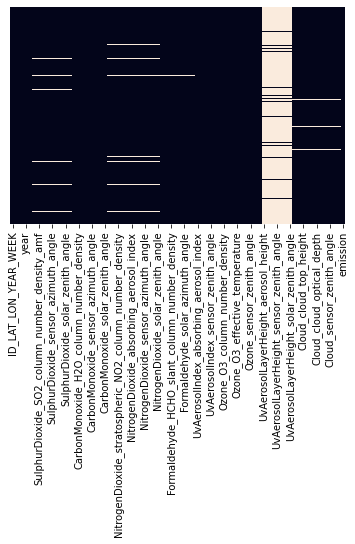

In [18]:
# Heatmap to see train dataset missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [17]:
# check for missing values for test data
test_missing = test.isna().mean()*100
test_missing_sorted = test_missing.sort_values(ascending=False)
print(test_missing_sorted)

UvAerosolLayerHeight_aerosol_height                        93.48407
UvAerosolLayerHeight_aerosol_pressure                      93.48407
UvAerosolLayerHeight_aerosol_optical_depth                 93.48407
UvAerosolLayerHeight_sensor_zenith_angle                   93.48407
UvAerosolLayerHeight_sensor_azimuth_angle                  93.48407
UvAerosolLayerHeight_solar_azimuth_angle                   93.48407
UvAerosolLayerHeight_solar_zenith_angle                    93.48407
Cloud_surface_albedo                                        4.03418
Cloud_cloud_top_pressure                                    4.03418
Cloud_cloud_top_height                                      4.03418
Cloud_cloud_base_pressure                                   4.03418
Cloud_cloud_base_height                                     4.03418
Cloud_cloud_optical_depth                                   4.03418
Cloud_solar_zenith_angle                                    4.03418
Cloud_cloud_fraction                            

<AxesSubplot:>

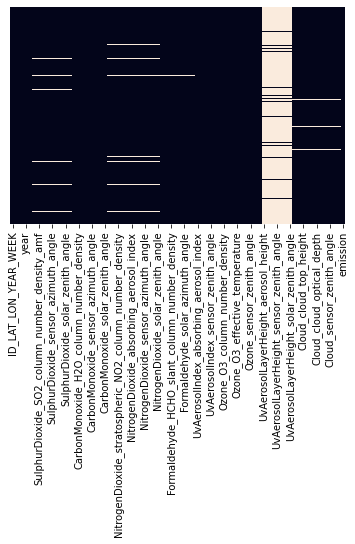

In [19]:
# Heatmap to see train dataset missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)